# Outline


<p><a name="sections"></a></p>


## Sections

- <a href="#dat">1. Data </a><br>
    - <a href="#cle">Missing Data & Imputation</a><br>
    - <a href="#dtf">Datetime Conversion</a><br>
    - <a href="#num">String to Numerical</a><br>
    - <a href="#uno">Data Merge</a><br>
- <a href="#nf">2. Basic EDA</a><br>
- <a href="#ts">3. Time Series EDA</a><br>
- <a href="#tsa">4. Time Series Analysis</a><br>

In [179]:
#create environment
import numpy as np
import pandas as pd
import scipy as sci
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from copy import deepcopy
from statsmodels.formula.api import ols
import statsmodels.api as sm
from datetime import datetime
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', 500)

<p><a name="dat"></a></p>
## 1. Data

In [180]:
#import data
uno_sale = pd.read_pickle('sales_latest_update.pkl')
uno_inv = pd.read_pickle('inventory.pkl')

In [181]:
uno_sale.head(30)

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,$ 576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,10/3/18,4/12/16,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,576.0
3,DTA1B2029,WG-COR,row wood bead stretch br,CHE005,2016-05-20,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,LA,71235,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-COR,39.0
4,DTA1B2029,WG-COR,row wood bead stretch br,GMA01,2016-08-22,24,3.25,$ 78.00,NaN,IMPORT,NOBLES,0,0,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-COR,78.0
5,DTA1B2029,WG-COR,row wood bead stretch br,HIS001,2016-08-03,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-COR,39.0
6,DTA1B2029,WG-COR,row wood bead stretch br,HIS001,2016-08-25,-12,3.25,$ (39.00),RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-COR,-39.0
7,DTA1B2029,WG-COR,row wood bead stretch br,PEN001,2016-04-04,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,VA,24522,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,4,DTA1B2029WG-COR,39.0
8,DTA1B2029,WG-COR,row wood bead stretch br,STA002,2016-04-06,12,3.25,$ 39.00,NaN,IMPORT,NOBLES,NY,10001,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,4,DTA1B2029WG-COR,39.0
9,DTA1B2029,WG-COR,row wood bead stretch br,THE008,2016-04-12,240,3.25,$ 780.00,NaN,IMPORT,NOBLES,MA,1720,2016,2016 1ST,SS16,4/11/16,4/4/16,10/3/18,4/4/16,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,4,DTA1B2029WG-COR,780.0


In [182]:
uno_sale.dtypes

STYLE#                     object
COLOR                      object
DESCRIPTION                object
CUST #                     object
INVC DATE          datetime64[ns]
QTY                         int64
UNIT PRICE                float64
EXT-AMT                    object
REASON                     object
IMPORT HANDMADE            object
MANUFACTORS                object
State_sold                 object
ZIP_sold                   object
RELEASED YEAR              object
Seasos                     object
Season target              object
LAST RCVD                  object
FIRST RCVD                 object
LAST INVOICED              object
FIRST INVOICED             object
Categories                 object
Categories1                object
Attribute                  object
material_style             object
year                        int64
month                       int64
Style_Color                object
Revenue                   float64
dtype: object

In [183]:
uno_inv.dtypes

STYLE#          object
COLOR           object
Description     object
LAST RCVD       object
Qty             object
On-Hand         object
Categories     float64
dtype: object

In [184]:
uno_inv.head()

,STYLE#,COLOR,Description,LAST RCVD,Qty,On-Hand,Categories
0,DTA1A9500,IV,seed bead anklet,4/12/2016,-144,0,NaN
1,DTA1A9500,IV,seed bead anklet,4/12/2016,144,0,NaN
2,DTA1A9500,MUL,seed bead anklet,4/12/2016,-144,0,NaN
3,DTA1A9500,MUL,seed bead anklet,4/12/2016,144,0,NaN
4,DTA1A9500,TQ,seed bead anklet,4/12/2016,-144,0,NaN


<p><a name="cle"></a></p>
### Missing Data & Imputation

In [185]:
def missing_value(df):
    nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
    nulls.columns=['NAs']
    nulls['percentage']=nulls['NAs']/df.shape[0]
    result=nulls.loc[nulls.NAs>0]
    print('Number of features with NAs:',result.shape[0])
    return result

In [186]:
missing_value(uno_sale)

Number of features with NAs: 4


,NAs,percentage
REASON,108410,0.976332
Style_Color,3981,0.035853
COLOR,3981,0.035853
MANUFACTORS,81,0.000729


In [187]:
missing_value(uno_inv)

Number of features with NAs: 6


,NAs,percentage
Categories,144613,1.000000
COLOR,8289,0.057318
Description,8,0.000055
On-Hand,1,0.000007
Qty,1,0.000007
LAST RCVD,1,0.000007


In [188]:
uno_inv[uno_inv.isnull().any(axis=1)] #144725
uno_inv.drop(index=144725, inplace=True)

In [189]:
def impu_nmar(df,features):
    df[features]=df[features].fillna('None')
    
def impu_nmar0(df,features):
    df[features]=df[features].fillna(0.0)

In [190]:
uno_inv_nmar=['COLOR','Description']
uno_sale_nmar=['REASON', 'COLOR','MANUFACTORS']
impu_nmar(uno_inv, uno_inv_nmar)
impu_nmar(uno_sale, uno_sale_nmar)

In [191]:
missing_value(uno_inv)

Number of features with NAs: 1


,NAs,percentage
Categories,144612,1.0


In [192]:
missing_value(uno_sale)

Number of features with NAs: 1


,NAs,percentage
Style_Color,3981,0.035853


<p><a name="dtf"></a></p>
### Datetime Conversion

In [193]:
#format='%m/%d/%y %H:%M'
def str_to_datetime(df, features):
    for feature in features:
        df[feature]=pd.to_datetime(df[feature], format='%m/%d/%y %H:%M', errors='ignore')
    
#format='%m/%d/%y'
def str_to_date(df, features):
    for feature in features:
        df[feature]=pd.to_datetime(df[feature], format='%m/%d/%y', errors='ignore')

#format='%m/%d/%Y'
def str_to_date1(df, features):
    for feature in features:
        df[feature]=pd.to_datetime(df[feature], format='%m/%d/%Y', errors='ignore')

In [194]:
#date features in uno
uno_inv_todate=['LAST RCVD']
uno_sale_todate=['INVC DATE','LAST RCVD','FIRST RCVD','LAST INVOICED','FIRST INVOICED']

#format='%m/%d/%Y'
str_to_date(uno_sale, uno_sale_todate)
str_to_date1(uno_inv, uno_inv_todate)

In [195]:
uno_sale.dtypes

STYLE#                     object
COLOR                      object
DESCRIPTION                object
CUST #                     object
INVC DATE          datetime64[ns]
QTY                         int64
UNIT PRICE                float64
EXT-AMT                    object
REASON                     object
IMPORT HANDMADE            object
MANUFACTORS                object
State_sold                 object
ZIP_sold                   object
RELEASED YEAR              object
Seasos                     object
Season target              object
LAST RCVD                  object
FIRST RCVD                 object
LAST INVOICED      datetime64[ns]
FIRST INVOICED     datetime64[ns]
Categories                 object
Categories1                object
Attribute                  object
material_style             object
year                        int64
month                       int64
Style_Color                object
Revenue                   float64
dtype: object

In [196]:
uno_sale.Categories1.unique()

array(['Accessories', 'Bracelet', 'EarRings', 'others', 'Necklace',
       'Tassel', 'Charm', 'Ring'], dtype=object)

<p><a name="num"></a></p>
### String to Numerical

In [197]:
def num(df, features):
    for feature in features:
        df[feature]=df[feature].replace('[$,() ]', '', regex=True).astype(float)

In [198]:
uno_inv_tonum=['Qty','On-Hand']
uno_sale_tonum=['UNIT PRICE','EXT-AMT']
num(uno_inv, uno_inv_tonum)
num(uno_sale, uno_sale_tonum)

In [199]:
uno_sale.head()

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.00,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0
1,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.00,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0
2,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.00,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,4/12/16,4/12/16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,576.0
3,DTA1B2029,WG-COR,row wood bead stretch br,CHE005,2016-05-20,12,3.25,39.0,None,IMPORT,NOBLES,LA,71235,2016,2016 1ST,SS16,4/11/16,4/4/16,2018-10-03,2016-04-04,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,5,DTA1B2029WG-COR,39.0
4,DTA1B2029,WG-COR,row wood bead stretch br,GMA01,2016-08-22,24,3.25,78.0,None,IMPORT,NOBLES,0,0,2016,2016 1ST,SS16,4/11/16,4/4/16,2018-10-03,2016-04-04,"[row, wood, bead, stretch, br]",Bracelet,row wood bead stretch br,bead,2016,8,DTA1B2029WG-COR,78.0


In [200]:
uno_sale.dtypes

STYLE#                     object
COLOR                      object
DESCRIPTION                object
CUST #                     object
INVC DATE          datetime64[ns]
QTY                         int64
UNIT PRICE                float64
EXT-AMT                   float64
REASON                     object
IMPORT HANDMADE            object
MANUFACTORS                object
State_sold                 object
ZIP_sold                   object
RELEASED YEAR              object
Seasos                     object
Season target              object
LAST RCVD                  object
FIRST RCVD                 object
LAST INVOICED      datetime64[ns]
FIRST INVOICED     datetime64[ns]
Categories                 object
Categories1                object
Attribute                  object
material_style             object
year                        int64
month                       int64
Style_Color                object
Revenue                   float64
dtype: object

In [201]:
uno_sale.to_pickle("uno_sale_ec.pkl")
uno_inv.to_pickle("uno_inv_ec.pkl")

<p><a name="uno"></a></p>
### Data Merge

In [67]:
uno_sale_subset = uno_sale.drop(columns=['LAST RCVD', 'FIRST RCVD'])
uno_inv_subset = uno_inv[['COLOR','Description','LAST RCVD','On-Hand']]
uno_merged = pd.merge(uno_sale_subset, uno_inv_subset, how='left', left_on=['COLOR','DESCRIPTION','INVC DATE'],\
                 right_on=['COLOR', 'Description', 'LAST RCVD'])
uno_merged.drop(columns=['Description','LAST RCVD'], inplace=True)
uno_merged.head() 

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue,On-Hand
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.0,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0,0.0
1,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.0,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0,0.0
2,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.0,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0,0.0
3,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.0,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0,0.0
4,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.0,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,576.0,0.0


In [68]:
uno_merged['VAR COST'] = [x/2 for x in uno_merged['EXT-AMT']]
uno_merged['QTYINV Ratio'] = (uno_merged['On-Hand']-uno_merged['QTY'])/uno_merged['On-Hand']
uno_merged.replace(np.inf, 0, inplace=True)
uno_merged.head()

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST INVOICED,FIRST INVOICED,Categories,Categories1,Attribute,material_style,year,month,Style_Color,Revenue,On-Hand,VAR COST,QTYINV Ratio
0,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.0,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0,0.0,288.0,-inf
1,DTA1A9500,IV,seed bead anklet,CB001,2016-04-12,144,4.0,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500IV,576.0,0.0,288.0,-inf
2,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.0,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0,0.0,288.0,-inf
3,DTA1A9500,MUL,seed bead anklet,CB001,2016-04-12,144,4.0,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500MUL,576.0,0.0,288.0,-inf
4,DTA1A9500,TQ,seed bead anklet,CB001,2016-04-12,144,4.0,576.0,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2018-10-03,2016-04-12,"[seed, bead, anklet]",Accessories,seed bead anklet,bead,2016,4,DTA1A9500TQ,576.0,0.0,288.0,-inf


In [69]:
uno_bypdt = uno_merged.groupby(['DESCRIPTION']).agg('sum').reset_index()
uno_bypdt.drop(columns=['year','month','QTYINV Ratio'],inplace=True)
#uno_bypdt['invturn ratio'] = uno_bypdt['EXT-AMT']/(2*)
uno_bypdt.head()

,DESCRIPTION,QTY,UNIT PRICE,EXT-AMT,Revenue,On-Hand,VAR COST
0,,2097,555.75,12487.26,12411.00,0.0,6243.63
1,a initial bar adj brac wg,450,5.36,1207.26,1207.26,0.0,603.63
2,a initial circle disk pend,284,2.25,639.00,639.00,0.0,319.50
3,a large natural srtone in texture l,1151,480.25,10079.50,10062.50,-5184.0,5039.75
4,a linear bar initial pendant,302,2.75,830.50,830.50,0.0,415.25


<p><a name="nf"></a></p>
## 2. Basic EDA

In [176]:
 #function returns the percentage of each item in a category
def uniq_count(df,feature):
    df_group = df.groupby(feature)
    uniq_count = pd.DataFrame(df_group.agg({'QTY': 'sum'}).sort_values('QTY',ascending=False)).reset_index()
    uniq_count.columns=[feature,'count']
    
    uniq_count['percentage %']=uniq_count['count']/sum(uniq_count['count'])*100
        
    ax = sns.barplot(x="percentage %", y=feature, data=uniq_count.head(5))
    plt.rcParams['figure.figsize']=(5,5)
    
def uniq_rev(df,feature):
    df_group = df.groupby(feature)
    uniq_count = pd.DataFrame(df_group.agg({'EXT-AMT': 'sum'}).sort_values('EXT-AMT',ascending=False)).reset_index()
    uniq_count.columns=[feature,'revenue']
    
    uniq_count['percentage %']=uniq_count['revenue']/sum(uniq_count['revenue'])*100
        
    ax = sns.barplot(x="percentage %", y=feature, data=uniq_count)
    plt.rcParams['figure.figsize']=(5,5)

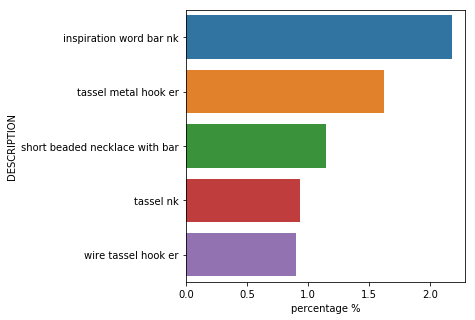

In [71]:
uniq_count(uno_merged,'DESCRIPTION') 

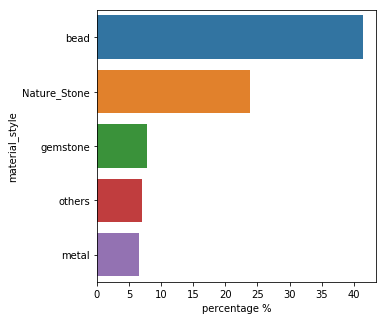

In [72]:
uniq_count(uno_merged[uno_merged['Season target']=="SS16"],'material_style') 

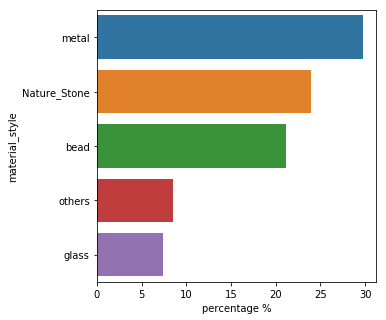

In [73]:
uniq_rev(uno_merged[uno_merged['Season target']=="FW16"],'material_style') 

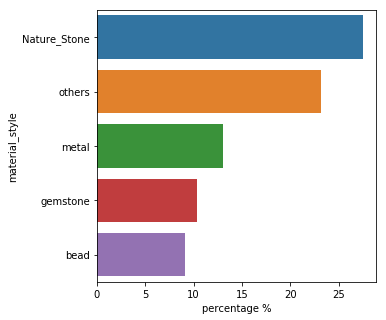

In [74]:
uniq_rev(uno_merged[uno_merged['Season target']=="SS17"],'material_style') 

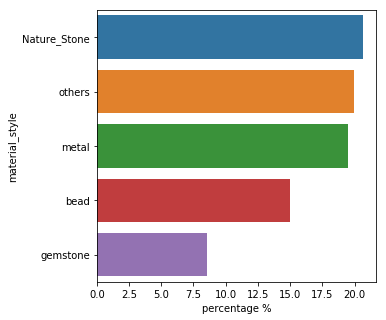

In [75]:
uniq_rev(uno_merged[uno_merged['Season target']=="FW17"],'material_style') 

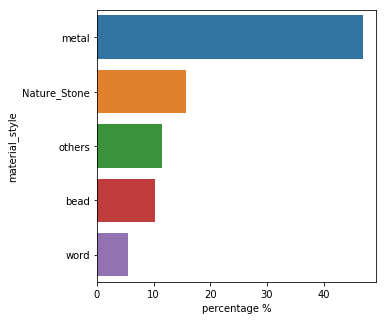

In [76]:
uniq_rev(uno_merged[uno_merged['Season target']=="SS18"],'material_style') 

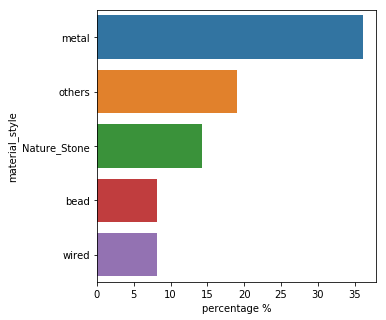

In [77]:
uniq_rev(uno_merged[uno_merged['Season target']=="FW18"],'material_style') 

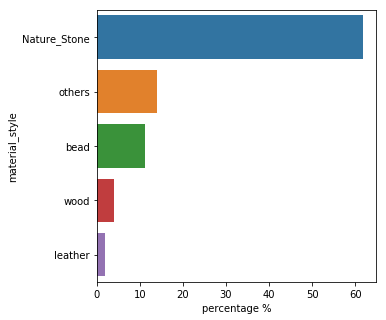

In [78]:
uniq_rev(uno_merged[uno_merged['RELEASED YEAR']=="BEFORE 2016"],'material_style') 

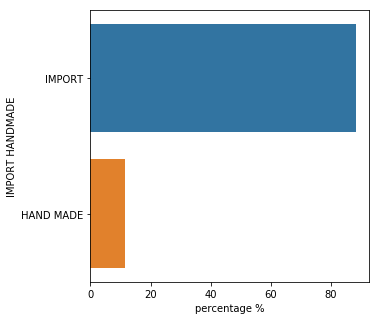

In [79]:
uniq_count(uno_merged,'IMPORT HANDMADE')

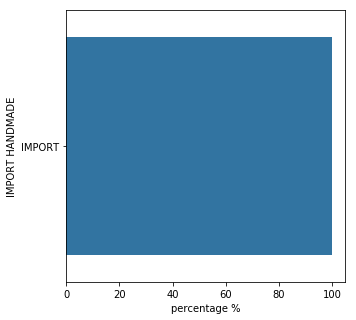

In [80]:
uniq_count(uno_merged[uno_merged['Season target']=="SS16"],'IMPORT HANDMADE') 

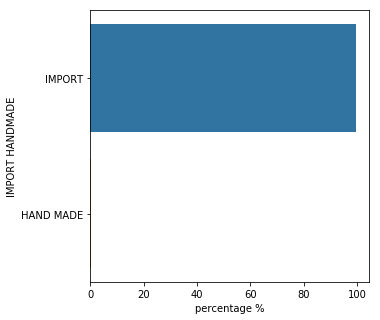

In [81]:
uniq_count(uno_merged[uno_merged['Season target']=="FW16"],'IMPORT HANDMADE') 

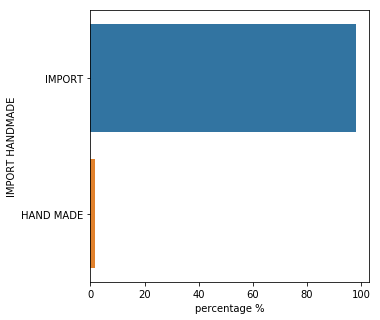

In [82]:
uniq_count(uno_merged[uno_merged['Season target']=="SS17"],'IMPORT HANDMADE') 

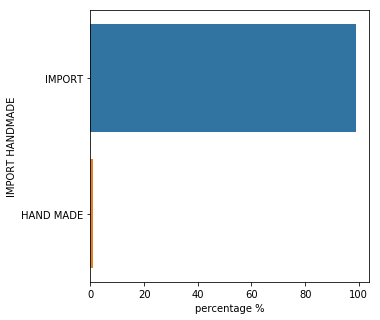

In [83]:
uniq_count(uno_merged[uno_merged['Season target']=="FW17"],'IMPORT HANDMADE') 

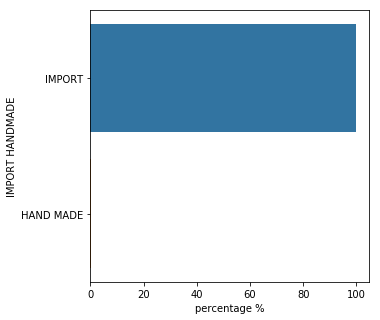

In [84]:
uniq_count(uno_merged[uno_merged['Season target']=="SS18"],'IMPORT HANDMADE') 

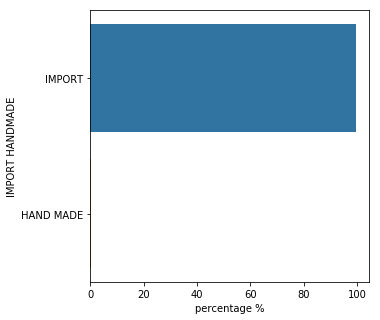

In [85]:
uniq_count(uno_merged[uno_merged['Season target']=="FW18"],'IMPORT HANDMADE') 

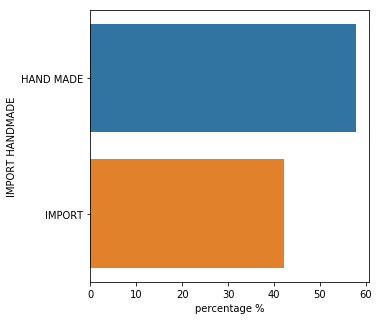

In [86]:
uniq_count(uno_merged[uno_merged['RELEASED YEAR']=="BEFORE 2016"],'IMPORT HANDMADE') 

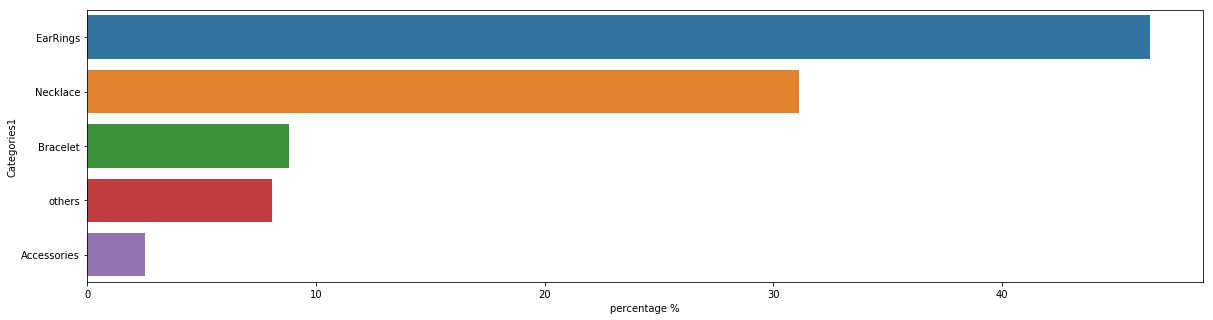

In [177]:
uniq_count(uno_merged,'Categories1')

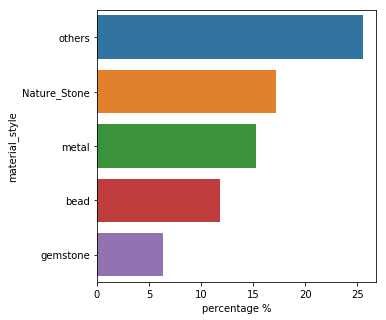

In [88]:
uniq_count(uno_merged,'material_style')

In [89]:
uno_merged['returned'] = ['Returned' if x<0 else 'Sold' for x in uno_merged['QTY'] ]
df_group = uno_merged.groupby('State_sold')
uniq_count = pd.DataFrame(df_group.agg({'EXT-AMT': 'sum'}).sort_values('EXT-AMT', ascending=False)).reset_index()
uniq_count.columns=['State_sold','Revenue']

returned_df = uno_merged[uno_merged.returned=='Returned'].groupby(['State_sold','returned']).\
agg({'EXT-AMT': 'sum'}).sort_values('EXT-AMT', ascending=False).reset_index()

uniq_count_df = pd.merge(uniq_count, returned_df, how='left', left_on=['State_sold'],right_on=['State_sold'])
uniq_count_df.drop(columns='returned',inplace=True)
uniq_count_df.columns = ['State','Revenue','Returned Amount']
uniq_count_df['Perc Returned'] = uniq_count_df['Returned Amount'] / uniq_count_df['Revenue']*100
uniq_count_df.sort_values('Perc Returned', ascending=False).head() 
#plt.figure(figsize=(10,5))
#sns.barplot(x="State", y="Revenue", hue="Returned", ci=None, data=uniq_count)

,State,Revenue,Returned Amount,Perc Returned
32,MT,28839.00,4200.00,14.563612
31,UK,31482.25,1175.75,3.734644
15,OH,175065.75,5983.00,3.417573
8,AL,533863.00,10538.50,1.974008
33,PA,22010.00,366.00,1.662881


In [90]:
uniq_count(uno_merged,'MANUFACTORS')

TypeError: 'DataFrame' object is not callable

In [91]:
#what is taking up the most space in storage
def qtyinv_ratio(df,feature):
    df_group = df.groupby(feature).agg({'QTY': 'sum', 'On-Hand': 'sum'}).reset_index()
    df_group['qtyinv ratio'] = (df_group['On-Hand'].abs()-df_group['QTY'])/df_group['On-Hand'].abs()
    df_group.replace(np.inf,0, inplace=True)
    df_group = df_group.sort_values('qtyinv ratio',ascending=False)
    ax = sns.barplot(x="qtyinv ratio", y=feature, data=df_group.head(5))
    plt.rcParams['figure.figsize']=(5,5)

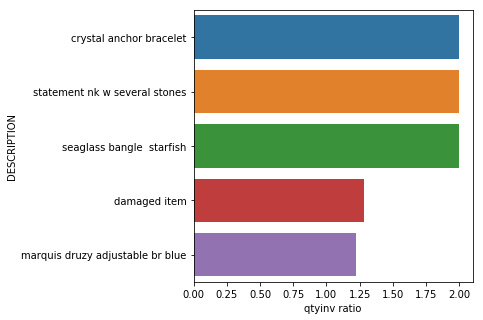

In [92]:
qtyinv_ratio(uno_merged,'DESCRIPTION')

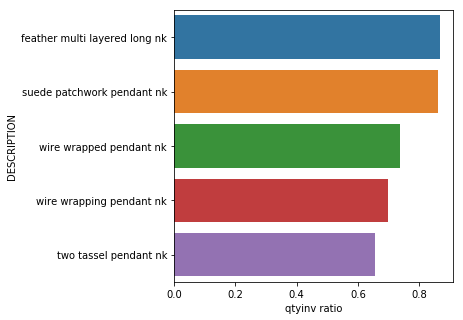

In [93]:
qtyinv_ratio(uno_merged[uno_merged['Season target']=="SS16"],'DESCRIPTION') 

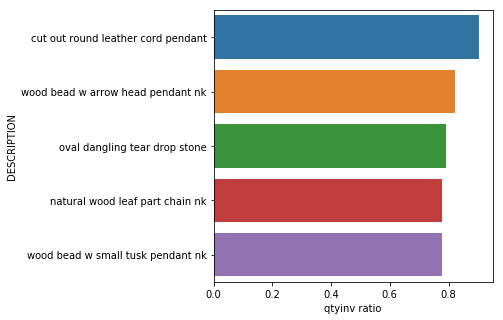

In [94]:
qtyinv_ratio(uno_merged[uno_merged['Season target']=="FW16"],'DESCRIPTION') 

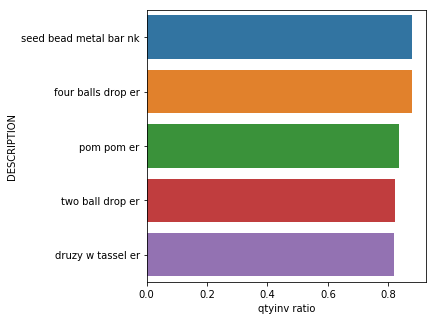

In [95]:
qtyinv_ratio(uno_merged[uno_merged['Season target']=="SS17"],'DESCRIPTION') 

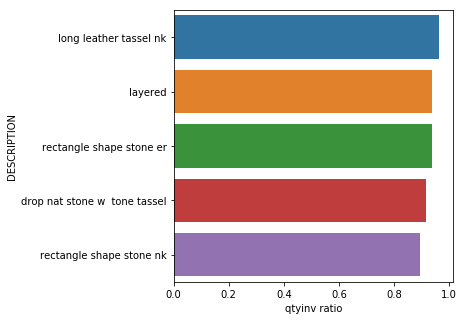

In [96]:
qtyinv_ratio(uno_merged[uno_merged['Season target']=="FW17"],'DESCRIPTION') 

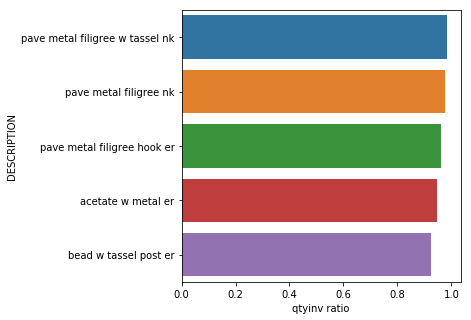

In [97]:
qtyinv_ratio(uno_merged[uno_merged['Season target']=="SS18"],'DESCRIPTION') 

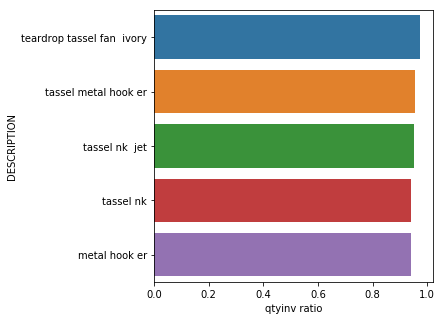

In [98]:
qtyinv_ratio(uno_merged[uno_merged['Season target']=="FW18"],'DESCRIPTION') 

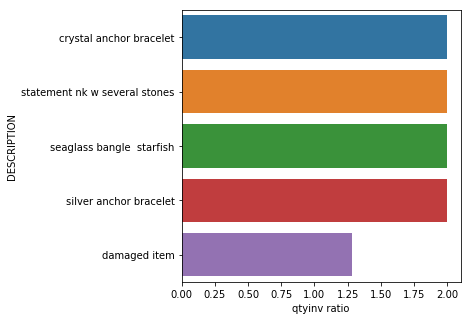

In [99]:
qtyinv_ratio(uno_merged[uno_merged['RELEASED YEAR']=="BEFORE 2016"],'DESCRIPTION') 

<p><a name="ts"></a></p>
## 3. Time Series EDA

In [100]:
uno_merged.columns

Index(['STYLE#', 'COLOR', 'DESCRIPTION', 'CUST #', 'INVC DATE', 'QTY',
       'UNIT PRICE', 'EXT-AMT', 'REASON', 'IMPORT HANDMADE', 'MANUFACTORS',
       'State_sold', 'ZIP_sold', 'RELEASED YEAR', 'Seasos', 'Season target',
       'LAST INVOICED', 'FIRST INVOICED', 'Categories', 'Categories1',
       'Attribute', 'material_style', 'year', 'month', 'Style_Color',
       'Revenue', 'On-Hand', 'VAR COST', 'QTYINV Ratio', 'returned'],
      dtype='object')

In [101]:
uno_merged.groupby(['Season target','RELEASED YEAR']).agg({'QTY':'sum', 'EXT-AMT':'sum', 'VAR COST':'sum'}).\
sort_values('RELEASED YEAR').reset_index()

,Season target,RELEASED YEAR,QTY,EXT-AMT,VAR COST
0,FW16,2016,314753,1170512.60,585256.300
1,OLD,2016,1344023,4730173.91,2365086.955
2,SS16,2016,287364,1209408.25,604704.125
3,FW17,2017,763159,2412630.44,1206315.220
4,OLD,2017,1034997,2796104.64,1398052.320
5,SS17,2017,653632,2072826.45,1036413.225
6,FW18,2018,1193444,4065496.91,2032748.455
7,OLD,2018,950613,2345629.80,1172814.900
8,SS18,2018,679329,2039275.03,1019637.515
9,OLD,BEFORE 2016,957093,3650587.78,1825293.890


In [102]:
#For numerical features
#input time and target feature, return the time series change of this feature
def time_n(df,target_time, target_feature, mode='year'):
    
    if mode=='year':
        df=df.groupby(df[target_time].dt.year)[target_feature].sum()
    elif mode=='month':
        df=df.groupby(df[target_time].dt.to_period('M'))[target_feature].sum()
    else:
        df=df.groupby(df[target_time])[target_feature].sum()
    
    df.plot()
    #plt.plot(df) if use this, error appears dont know why



#For categorical features
#input time and target feature's item, return the time series change of this item
def time_c(df,target_time, target_feature, value, mode='year'):
    df=df[df[target_feature]==value]
    
    if mode=='year':
        df=df.groupby(df[target_time].dt.year).size()
    elif mode=='month':
        df=df.groupby(df[target_time].dt.to_period('M')).size()
    else:
        df=df.groupby(df[target_time]).size()
                      
    df.plot(label=value)


In [103]:
uno_merged.columns

Index(['STYLE#', 'COLOR', 'DESCRIPTION', 'CUST #', 'INVC DATE', 'QTY',
       'UNIT PRICE', 'EXT-AMT', 'REASON', 'IMPORT HANDMADE', 'MANUFACTORS',
       'State_sold', 'ZIP_sold', 'RELEASED YEAR', 'Seasos', 'Season target',
       'LAST INVOICED', 'FIRST INVOICED', 'Categories', 'Categories1',
       'Attribute', 'material_style', 'year', 'month', 'Style_Color',
       'Revenue', 'On-Hand', 'VAR COST', 'QTYINV Ratio', 'returned'],
      dtype='object')

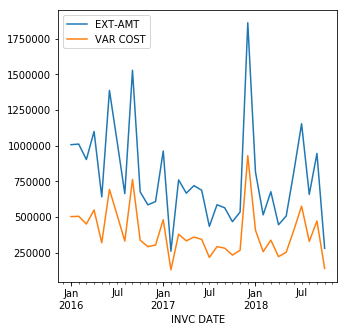

In [104]:
time_n(uno_merged,'INVC DATE', ['EXT-AMT','VAR COST'], 'month')

In [105]:
uno_merged_m = uno_merged.groupby(uno_merged['INVC DATE'].dt.to_period('M')).sum().reset_index()
uno_merged_m.drop(columns=['UNIT PRICE','year','month','QTYINV Ratio'], inplace=True)

uno_merged_m.head()

,INVC DATE,QTY,EXT-AMT,Revenue,On-Hand,VAR COST
0,2016-01,239001,1007474.44,994018.88,-1376455.0,503737.220
1,2016-02,288876,1011925.99,1002987.73,-939892.0,505962.995
2,2016-03,237301,903643.42,751375.36,-835723.0,451821.710
3,2016-04,287033,1100302.48,1061262.03,-792588.0,550151.240
4,2016-05,199123,641552.33,601506.77,-483270.0,320776.165


In [106]:
uno_merged_m['FIX COST'] = [20000] * uno_merged_m.shape[0]
uno_merged_m['COST'] = uno_merged_m['VAR COST'] + uno_merged_m['FIX COST']
uno_merged_m['PROFIT'] = uno_merged_m['EXT-AMT'] - uno_merged_m['VAR COST'] - uno_merged_m['FIX COST']
uno_merged_m['QTYINV Ratio'] = (uno_merged_m['On-Hand'].abs()-uno_merged_m['QTY'])/uno_merged_m['On-Hand'].abs()
uno_merged_m.head()

,INVC DATE,QTY,EXT-AMT,Revenue,On-Hand,VAR COST,FIX COST,COST,PROFIT,QTYINV Ratio
0,2016-01,239001,1007474.44,994018.88,-1376455.0,503737.220,20000,523737.220,483737.220,0.826365
1,2016-02,288876,1011925.99,1002987.73,-939892.0,505962.995,20000,525962.995,485962.995,0.692650
2,2016-03,237301,903643.42,751375.36,-835723.0,451821.710,20000,471821.710,431821.710,0.716053
3,2016-04,287033,1100302.48,1061262.03,-792588.0,550151.240,20000,570151.240,530151.240,0.637853
4,2016-05,199123,641552.33,601506.77,-483270.0,320776.165,20000,340776.165,300776.165,0.587967


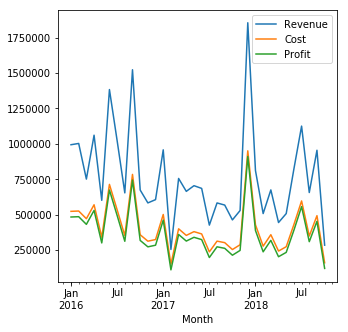

In [107]:
monthlydat = uno_merged_m[['INVC DATE', 'Revenue','COST','PROFIT']]
monthlydat.columns = ['Month','Revenue','Cost','Profit']
monthlydat.head()
monthlydat.plot(x='Month')
plt.rcParams['figure.figsize']=(20,5)

In [108]:
monthlydat['month_n'] = monthlydat['Month'].dt.month
monthlydat['year_n'] = monthlydat['Month'].dt.year
monthlydat.head()

/Users/hee-wonchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/hee-wonchang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Month,Revenue,Cost,Profit,month_n,year_n
0,2016-01,994018.88,523737.220,483737.220,1,2016
1,2016-02,1002987.73,525962.995,485962.995,2,2016
2,2016-03,751375.36,471821.710,431821.710,3,2016
3,2016-04,1061262.03,570151.240,530151.240,4,2016
4,2016-05,601506.77,340776.165,300776.165,5,2016


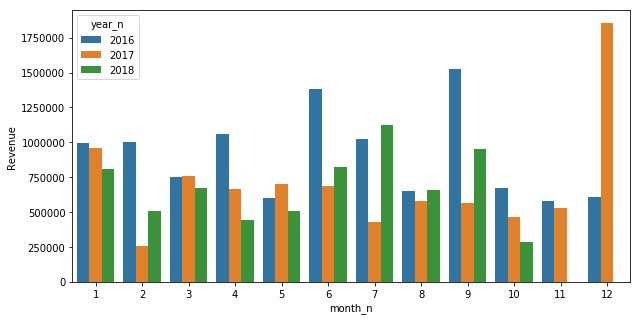

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(x="month_n", y="Revenue", hue="year_n", ci=None, data=monthlydat)

In [110]:
uno_merged.columns

Index(['STYLE#', 'COLOR', 'DESCRIPTION', 'CUST #', 'INVC DATE', 'QTY',
       'UNIT PRICE', 'EXT-AMT', 'REASON', 'IMPORT HANDMADE', 'MANUFACTORS',
       'State_sold', 'ZIP_sold', 'RELEASED YEAR', 'Seasos', 'Season target',
       'LAST INVOICED', 'FIRST INVOICED', 'Categories', 'Categories1',
       'Attribute', 'material_style', 'year', 'month', 'Style_Color',
       'Revenue', 'On-Hand', 'VAR COST', 'QTYINV Ratio', 'returned'],
      dtype='object')

In [111]:
text = uno_merged.Categories[uno_merged['year']==2018]
text = [val for sublist in text for val in sublist]
text = ' '.join(word for word in text)

'x mm natural clover shape x mm natural clover shape x mm natural clover shape x mm natural clover shape facet semi stone earrings mint knife cut thin organic td knife cut thin organic td knife cut thin organic td pear shape natural stone pear shape natural stone pear shape natural stone pear shape natural stone pear shape natural stone pear shape natural stone pear shape natural stone pear shape natural stone pear shape natural stone pear shape natural stone pear shape natural stone pear shape natural stone pear shape natural stone pear shape natural stone pear shape natural stone x pear shape wire wrapped stone x pear shape wire wrapped stone x pear shape wire wrapped stone x pear shape wire wrapped stone x pear shape wire wrapped stone x pear shape wire wrapped stone x pear shape wire wrapped stone oval shape stone long nk stones drop long nk w tassel stones drop long nk w tassel stones drop long nk w tassel stones drop long nk w tassel clover textured cast x stone clover textured c

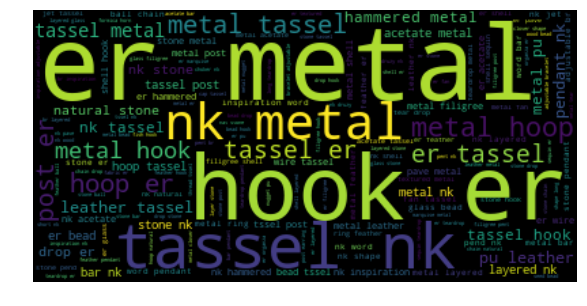

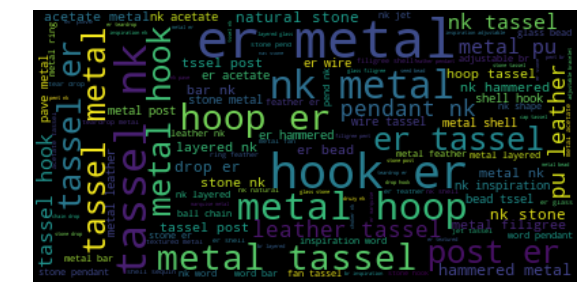

In [112]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
#d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
#text = ' '.join(word for word in text)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

<p><a name="tsa"></a></p>
## 4. Time Series Analysis (continues in other notebook)

In [125]:
uno_ts = uno_merged.groupby('INVC DATE').agg('sum').reset_index()
uno_ts.drop(columns=['year','month','Revenue','QTYINV Ratio','UNIT PRICE','VAR COST'],inplace=True)
uno_ts['INVC DATE'].describe()

count                     699
unique                    699
top       2016-09-08 00:00:00
freq                        1
first     2016-01-04 00:00:00
last      2018-10-03 00:00:00
Name: INVC DATE, dtype: object

In [126]:
idx = pd.date_range(uno_ts['INVC DATE'].min(), uno_ts['INVC DATE'].max())
idx = pd.DataFrame(data=idx, columns=['Date'])

In [133]:
uno_tsdf = pd.merge(idx, uno_ts, how='left', left_on=['Date'],right_on=['INVC DATE'])
uno_tsdf.drop(columns=['INVC DATE'], inplace=True)
uno_tsdf.fillna(method='ffill', inplace=True)
uno_tsdf.columns=['Date','Quantity','Revenue','Inventory']
uno_tsdf.set_index('Date',inplace=True)
uno_tsdf.head(10)

,Quantity,Revenue,Inventory
Date,,,
2016-01-04,22947.0,99461.25,-14709.0
2016-01-05,56844.0,263037.00,-310124.0
2016-01-06,5900.0,24272.41,-29685.0
2016-01-07,13615.0,57446.90,-177176.0
2016-01-08,15259.0,71866.05,-102222.0
2016-01-09,15259.0,71866.05,-102222.0
2016-01-10,15259.0,71866.05,-102222.0
2016-01-11,4385.0,27044.30,-29836.0
2016-01-12,25308.0,110814.90,-183793.0


In [134]:
uno_tsdf.to_pickle('uno_tsdf.pkl')
uno_tsdf.describe()

,Quantity,Revenue,Inventory
count,1004.000000,1.004000e+03,1004.000000
mean,12514.811753,4.152775e+04,2091.153386
std,19061.592934,5.727752e+04,62824.625303
min,-12913.000000,7.200000e+01,-310124.000000
25%,3444.000000,1.265336e+04,-13161.500000
50%,7889.000000,2.696441e+04,345.500000
75%,15720.000000,5.066800e+04,11315.000000
max,406543.000000,1.221166e+06,610051.000000


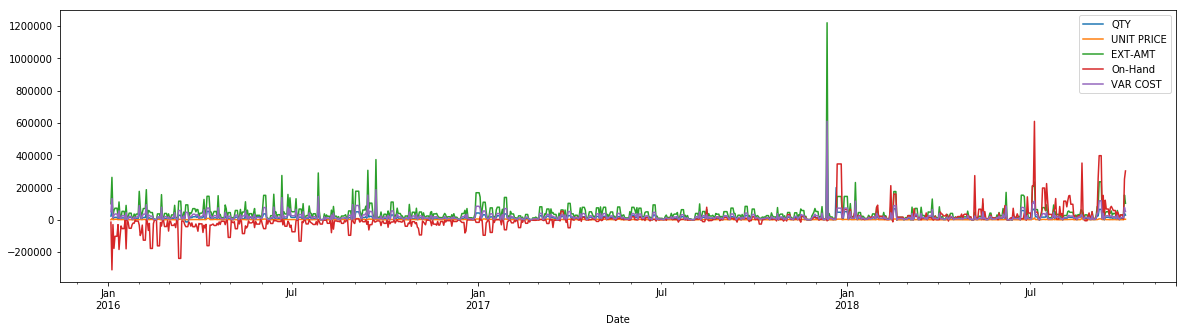

In [123]:
uno_tsdf.plot(x='Date')
plt.rcParams['figure.figsize']=(20,5)

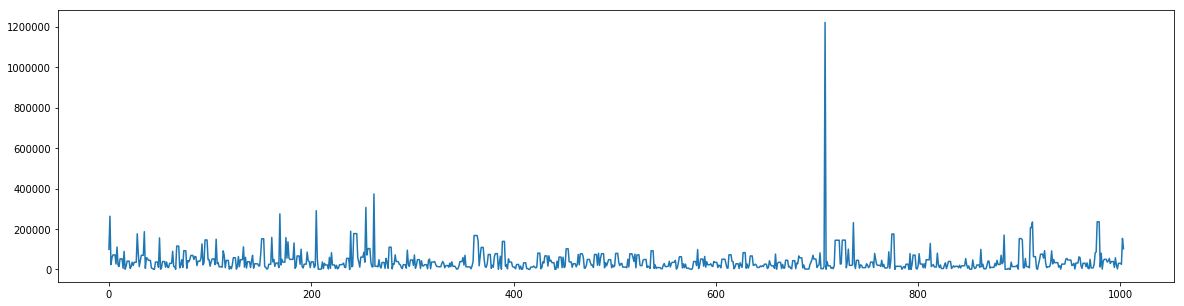

In [119]:
uno_tsdf['EXT-AMT'].plot(x='Date')
plt.rcParams['figure.figsize']=(20,5)

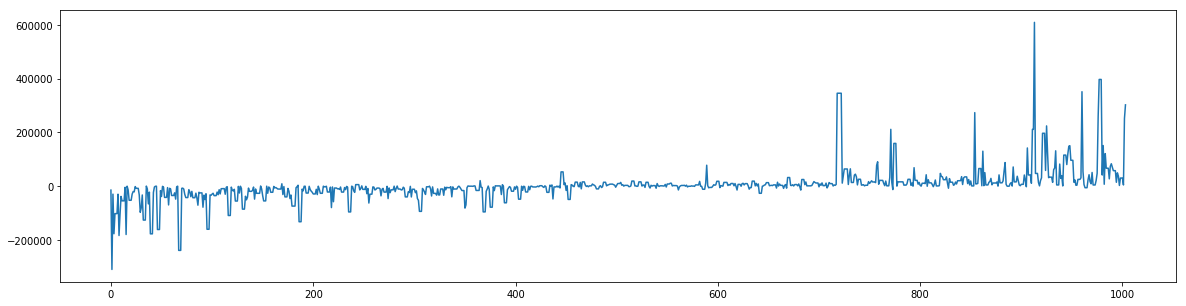

In [124]:
uno_tsdf['On-Hand'].plot(x='Date')
plt.rcParams['figure.figsize']=(20,5)

In [136]:
uno_ts2 = uno_merged.groupby(['INVC DATE','Categories1']).agg('sum').reset_index()
uno_ts2.drop(columns=['year','month','Revenue','QTYINV Ratio','UNIT PRICE','VAR COST'],inplace=True)
uno_ts2['INVC DATE'].describe()

count                    3830
unique                    699
top       2017-04-13 00:00:00
freq                        8
first     2016-01-04 00:00:00
last      2018-10-03 00:00:00
Name: INVC DATE, dtype: object

In [149]:
uno_ts2.head(10)

,INVC DATE,Categories1,QTY,EXT-AMT,On-Hand
0,2016-01-04,Accessories,348,2472.00,-5331.0
1,2016-01-04,Bracelet,696,2499.00,-600.0
2,2016-01-04,Charm,72,198.00,0.0
3,2016-01-04,EarRings,8290,31354.10,-353.0
4,2016-01-04,Necklace,1932,9561.30,-5028.0
5,2016-01-04,Tassel,9997,45350.85,-3109.0
6,2016-01-04,others,1612,8026.00,-288.0
7,2016-01-05,Accessories,3062,15175.50,-6284.0
8,2016-01-05,Bracelet,2750,13091.00,-47094.0
9,2016-01-05,Charm,312,768.00,0.0


In [157]:
uno_ts2_cat = uno_ts2[['INVC DATE','Categories1','EXT-AMT']].pivot(index='INVC DATE',columns='Categories1', values='EXT-AMT')
uno_ts2_cat = pd.DataFrame(uno_ts2_cat.reset_index())
uno_ts2_cat.head()

Categories1,INVC DATE,Accessories,Bracelet,Charm,EarRings,Necklace,Ring,Tassel,others
0,2016-01-04,2472.00,2499.0,198.0,31354.1,9561.30,NaN,45350.85,8026.00
1,2016-01-05,15175.50,13091.0,768.0,51240.0,112563.00,NaN,46110.00,24089.50
2,2016-01-06,2816.85,1225.2,NaN,7548.3,7917.91,NaN,1440.15,3324.00
3,2016-01-07,1734.00,7784.4,27.0,16172.5,26038.00,NaN,3621.00,2070.00
4,2016-01-08,1337.25,9180.0,1213.8,20834.4,21399.75,NaN,5298.00,12602.85


In [161]:
idx2 = pd.date_range(uno_ts2_cat['INVC DATE'].min(), uno_ts2_cat['INVC DATE'].max())
idx2 = pd.DataFrame(data=idx2, columns=['Date'])

In [170]:
uno_tsdf_cat = pd.merge(idx2, uno_ts2_cat, how='left', left_on=['Date'],right_on=['INVC DATE'])
uno_tsdf_cat.drop(columns=['INVC DATE','Charm','Tassel','others'], inplace=True)
uno_tsdf_cat.fillna(method='ffill', inplace=True)
uno_tsdf_cat.set_index('Date',inplace=True)
uno_tsdf_cat.Ring.fillna(0, inplace=True)
uno_tsdf_cat.head(10)

,Accessories,Bracelet,EarRings,Necklace,Ring
Date,,,,,
2016-01-04,2472.00,2499.0,31354.1,9561.30,0.0
2016-01-05,15175.50,13091.0,51240.0,112563.00,0.0
2016-01-06,2816.85,1225.2,7548.3,7917.91,0.0
2016-01-07,1734.00,7784.4,16172.5,26038.00,0.0
2016-01-08,1337.25,9180.0,20834.4,21399.75,0.0
2016-01-09,1337.25,9180.0,20834.4,21399.75,0.0
2016-01-10,1337.25,9180.0,20834.4,21399.75,0.0
2016-01-11,1331.70,879.0,10246.8,5274.30,1309.5
2016-01-12,4431.00,12867.0,17163.9,32193.00,1309.5


In [171]:
uno_tsdf_cat.to_pickle('uno_tsdf_cat.pkl')
uno_tsdf_cat.describe()

,Accessories,Bracelet,EarRings,Necklace,Ring
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,1766.788924,3952.443496,17453.108137,14912.007510,541.732570
std,3237.167753,11943.463023,21681.499175,33909.447914,1163.359148
min,4.360000,3.250000,4.250000,6.000000,0.000000
25%,234.270000,468.720000,4851.000000,2657.062500,60.000000
50%,706.250000,1442.650000,11152.675000,6619.500000,171.000000
75%,2106.757500,3501.750000,20800.327500,15321.300000,648.000000
max,44508.600000,173206.350000,314355.480000,723924.240000,11700.000000
